In [1]:
## import dependencies 
import tensorflow as tf
import numpy as np 
import pandas as pd 
from datetime import datetime, date, time
import os 
import glob
import csv
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
date_form = DateFormatter("%m-%d")

In [2]:
## importing dependencies 
from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS 

## define influxdb paramters
token = "A1hvR7pmPINW66Wuxbb7dpwR74TukBJIC7IuP3ADhr4xTx0Zzx-JZxzgInUUFbikMsg_bNo2TI4QnbXnUIOkDg=="
org = "ThirdYearProject"
bucket = "de75cd94d8127ada"

## connect to influxdb
client = InfluxDBClient(url="http://localhost:8086", token=token, org=org)

In [3]:
## query data

query_api = client.query_api()

query3_train = 'from(bucket:"MicrosoftData")\
|> range(start:  2015-01-01T00:00:00Z, stop: 2015-11-01T11:59:59Z)\
|> filter(fn: (r) => r._measurement == "Network Prediction"\
and r.Channel == "channel_1303" and r.Segment == "34")\
|> pivot(rowKey:["_time"], columnKey:["_field"], valueColumn:"_value")\
|> keep(columns: ["_time", "Q-Factor"])'

query4_train = 'from(bucket:"MicrosoftData")\
|> range(start:  2015-01-01T00:00:00Z, stop: 2015-11-01T11:59:59Z)\
|> filter(fn: (r) => r._measurement == "Network Prediction"\
and r.Channel == "channel_1304" and r.Segment == "34")\
|> pivot(rowKey:["_time"], columnKey:["_field"], valueColumn:"_value")\
|> keep(columns: ["_time", "Q-Factor"])'

query5_train = 'from(bucket:"MicrosoftData")\
|> range(start:  2015-01-01T00:00:00Z, stop: 2015-11-01T11:59:59Z)\
|> filter(fn: (r) => r._measurement == "Network Prediction"\
and r.Channel == "channel_1305" and r.Segment == "34")\
|> pivot(rowKey:["_time"], columnKey:["_field"], valueColumn:"_value")\
|> keep(columns: ["_time", "Q-Factor"])'

query6_train = 'from(bucket:"MicrosoftData")\
|> range(start:  2015-01-01T00:00:00Z, stop: 2015-11-01T11:59:59Z)\
|> filter(fn: (r) => r._measurement == "Network Prediction"\
and r.Channel == "channel_1306" and r.Segment == "34")\
|> pivot(rowKey:["_time"], columnKey:["_field"], valueColumn:"_value")\
|> keep(columns: ["_time", "Q-Factor"])'

query7_train = 'from(bucket:"MicrosoftData")\
|> range(start:  2015-01-01T00:00:00Z, stop: 2015-11-01T11:59:59Z)\
|> filter(fn: (r) => r._measurement == "Network Prediction"\
and r.Channel == "channel_1307" and r.Segment == "34")\
|> pivot(rowKey:["_time"], columnKey:["_field"], valueColumn:"_value")\
|> keep(columns: ["_time", "Q-Factor"])'

def dataReady(query):
    data = query_api.query_data_frame(query)
    data.set_index("_time", inplace=True)
    data.index = pd.to_datetime(data.index)
    data.drop('result', axis=1, inplace=True)
    data.drop('table', axis=1, inplace=True)
    return data

data3  = dataReady(query3_train)
data4  = dataReady(query4_train)
data5  = dataReady(query5_train)
data6  = dataReady(query6_train)
data7  = dataReady(query7_train)


In [6]:
data3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Q-Factor,12444.0,12.06559,0.605948,7.97,12.19,12.23,12.27,12.52


In [7]:
data4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Q-Factor,12444.0,12.323656,0.545842,9.07,12.45,12.48,12.51,12.8


In [8]:
data5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Q-Factor,12444.0,12.219135,0.513935,9.09,12.34,12.36,12.39,12.68


In [9]:
data6.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Q-Factor,12444.0,12.129702,0.649276,8.13,12.28,12.32,12.35,12.63


In [10]:
data7.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Q-Factor,12444.0,12.022303,0.567534,8.8,12.13,12.18,12.22,12.5


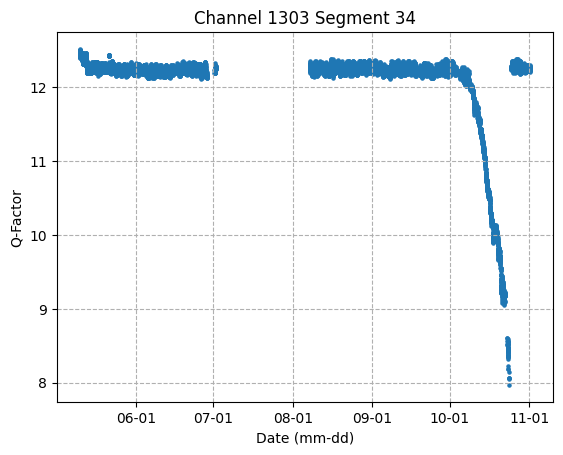

In [11]:
fig, ax = plt.subplots()
ax.scatter(data3.index, data3['Q-Factor'], s=5)
ax.set(xlabel="Date (mm-dd)", ylabel="Q-Factor")
ax.xaxis.set_major_formatter(date_form)
ax.grid(linestyle="--")
ax.set_title('Channel 1303 Segment 34')
plt.show()

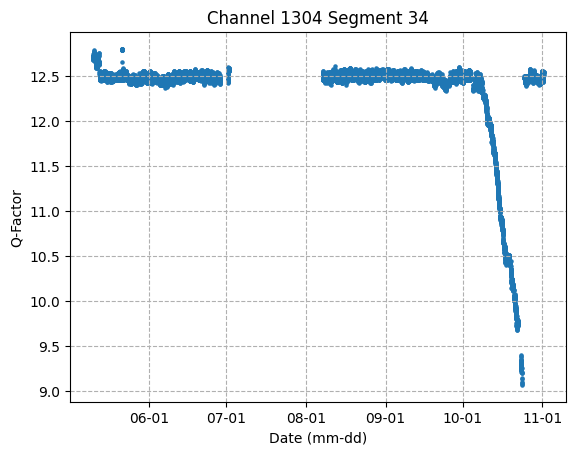

In [12]:
fig, ax = plt.subplots()
ax.scatter(data4.index, data4['Q-Factor'], s=5)
ax.set(xlabel="Date (mm-dd)", ylabel="Q-Factor")
ax.xaxis.set_major_formatter(date_form)
ax.grid(linestyle="--")
ax.set_title('Channel 1304 Segment 34')
plt.show()

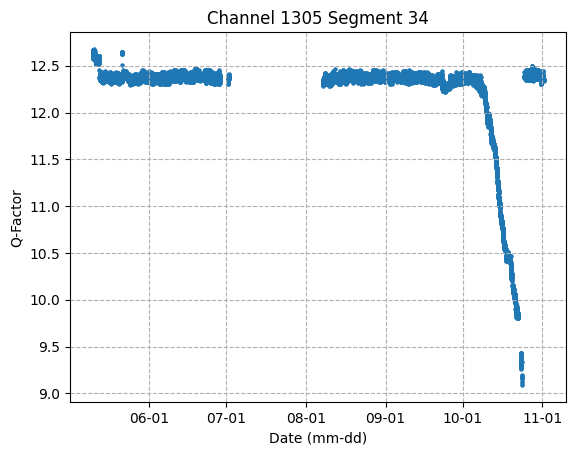

In [13]:
fig, ax = plt.subplots()
ax.scatter(data5.index, data5['Q-Factor'], s=5)
ax.set(xlabel="Date (mm-dd)", ylabel="Q-Factor")
ax.xaxis.set_major_formatter(date_form)
ax.grid(linestyle="--")
ax.set_title('Channel 1305 Segment 34')
plt.show()

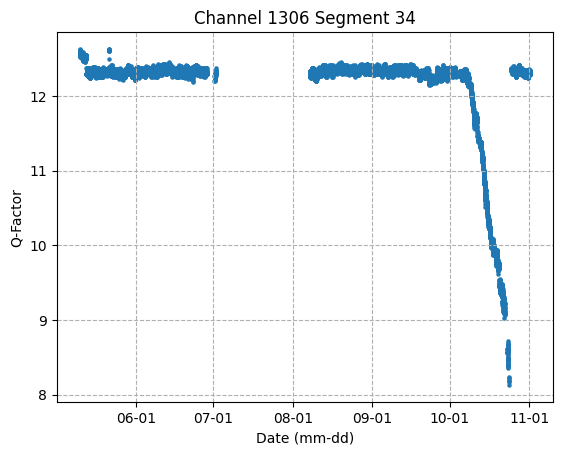

In [14]:
fig, ax = plt.subplots()
ax.scatter(data6.index, data6['Q-Factor'], s=5)
ax.set(xlabel="Date (mm-dd)", ylabel="Q-Factor")
ax.xaxis.set_major_formatter(date_form)
ax.grid(linestyle="--")
ax.set_title('Channel 1306 Segment 34')
plt.show()

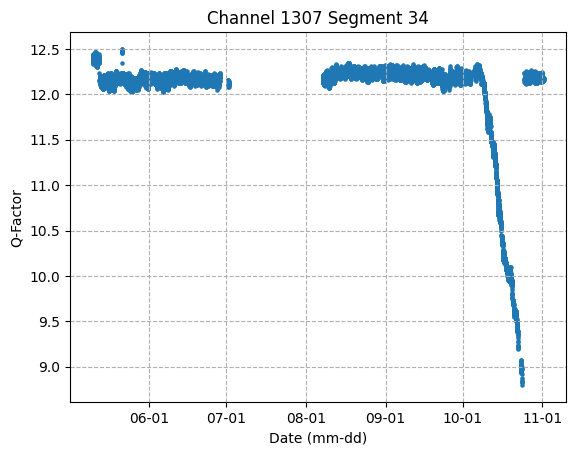

In [15]:
fig, ax = plt.subplots()
ax.scatter(data7.index, data7['Q-Factor'], s=5)
ax.set(xlabel="Date (mm-dd)", ylabel="Q-Factor")
ax.xaxis.set_major_formatter(date_form)
ax.grid(linestyle="--")
ax.set_title('Channel 1307 Segment 34')
plt.show()

In [16]:
#for col in data_train:
    #print(data_train[col].isnull().sum())

In [17]:
#function to create input features
def ts_data_generator(data, window_size, batch_size, shuffle_buffer):
    ts_data = tf.data.Dataset.from_tensor_slices(data)
    ts_data = ts_data.window(window_size + 1, shift=1, drop_remainder=True)
    ts_data = ts_data.flat_map(lambda window: window.batch(window_size+1))
    ts_data = ts_data.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    ts_data = ts_data.batch(batch_size).prefetch(1)
    return ts_data #expanding data into tensors 

## required parameters
WINDOW_SIZE = 335
BATCH_SIZE = 349
SHUFFLE_BUFFER = 12500

In [18]:
## converting data to numpy for better/faster processing 
time_index_data3 = np.array(data3.index)
data3_np = np.array(data3)
time_index_data4 = np.array(data4.index)
data4_np = np.array(data4)
time_index_data5 = np.array(data5.index)
data5_np = np.array(data5)
time_index_data6 = np.array(data6.index)
data6_np = np.array(data6)
time_index_data7 = np.array(data7.index)
data7_np = np.array(data7)

In [19]:
#splitting train into train/validation 
def splitData(data, time_index):
    n=len(data)
    train_data = data[:int(n*0.7)]
    train_time = time_index[:int(n*0.7)]
    val_data = data[int(n*0.7):int(n*0.75)]
    val_time = time_index[int(n*0.7):int(n*0.75)]
    test_data = data[int(n*0.75):]
    test_time = time_index[int(n*0.75):]
    return train_data, train_time, val_data, val_time, test_data, test_time

train_data3, train_time3, val_data3, val_time3, test_data3, test_time3 = splitData(data3_np, time_index_data3)
train_data4, train_time4, val_data4, val_time4, test_data4, test_time4 = splitData(data4_np, time_index_data4)
train_data5, train_time5, val_data5, val_time5, test_data5, test_time5 = splitData(data5_np, time_index_data5)
train_data6, train_time6, val_data6, val_time6, test_data6, test_time6 = splitData(data6_np, time_index_data6)
train_data7, train_time7, val_data7, val_time7, test_data7, test_time7 = splitData(data7_np, time_index_data7)

In [21]:
# generating input and output features for training and testing set 
def tensorData(train_data, val_data):
    tensor_train_data = tf.expand_dims(train_data, axis=-1)
    tensor_val_data = tf.expand_dims(val_data, axis=-1)

    tensor_train_dataset = ts_data_generator(tensor_train_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)
    tensor_val_dataset = ts_data_generator(tensor_val_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)
    return tensor_train_dataset, tensor_val_dataset

tensor_train_dataset3, tensor_val_dataset3 = tensorData(train_data3, val_data3)
tensor_train_dataset4, tensor_val_dataset4 = tensorData(train_data4, val_data4)
tensor_train_dataset5, tensor_val_dataset5 = tensorData(train_data5, val_data5)
tensor_train_dataset6, tensor_val_dataset6 = tensorData(train_data6, val_data6)
tensor_train_dataset7, tensor_val_dataset7 = tensorData(train_data7, val_data7)

In [22]:
#building model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu",
        input_shape=[None,1]),
    tf.keras.layers.LSTM(128, return_sequences=True),

    tf.keras.layers.LSTM(128, return_sequences=True), 
    
    tf.keras.layers.LSTM(128, return_sequences=True), 
    
    tf.keras.layers.LSTM(128, return_sequences=True), 
    
    tf.keras.layers.Dense(60, activation="relu"),  

    tf.keras.layers.Dense(30, activation="relu"),  

    tf.keras.layers.Dense(10, activation="relu"), 

    tf.keras.layers.Dense(1)])

model.summary()

optimiser = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=optimiser, metrics=[tf.keras.metrics.RootMeanSquaredError()])

## training model
history3 = model.fit(tensor_train_dataset3, epochs=20, validation_data=tensor_val_dataset3)
history4 = model.fit(tensor_train_dataset4, epochs=20, validation_data=tensor_val_dataset4)              
history5 = model.fit(tensor_train_dataset5, epochs=20, validation_data=tensor_val_dataset5) 
history6 = model.fit(tensor_train_dataset6, epochs=20, validation_data=tensor_val_dataset6) 
history7 = model.fit(tensor_train_dataset7, epochs=20, validation_data=tensor_val_dataset7)

combined_rmse = np.concatenate([history3.history['root_mean_squared_error'], history4.history['root_mean_squared_error'], history5.history['root_mean_squared_error'],history6.history['root_mean_squared_error'],history7.history['root_mean_squared_error']])
val_combined_rmse = np.concatenate([history3.history['val_root_mean_squared_error'], history4.history['val_root_mean_squared_error'], history5.history['val_root_mean_squared_error'],history6.history['val_root_mean_squared_error'],history7.history['val_root_mean_squared_error']])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 64)          384       
                                                                 
 lstm (LSTM)                 (None, None, 128)         98816     
                                                                 
 lstm_1 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         131584    
                                                                 
 lstm_3 (LSTM)               (None, None, 128)         131584    
                                                                 
 dense (Dense)               (None, None, 60)          7740      
                                                                 
 dense_1 (Dense)             (None, None, 30)          1

24/24 [==============================] - 598s 25s/step - loss: 0.0091 - root_mean_squared_error: 0.0953 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 20/20
24/24 [==============================] - 599s 25s/step - loss: 0.0088 - root_mean_squared_error: 0.0938 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1113
Epoch 1/20
24/24 [==============================] - 594s 25s/step - loss: 0.0103 - root_mean_squared_error: 0.1016 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1024
Epoch 2/20
24/24 [==============================] - 577s 24s/step - loss: 0.0079 - root_mean_squared_error: 0.0887 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1237
Epoch 3/20
24/24 [==============================] - 575s 24s/step - loss: 0.0074 - root_mean_squared_error: 0.0862 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 4/20
24/24 [==============================] - 563s 23s/step - loss: 0.0072 - root_mean_squared_error: 0.0848 - val_loss: 0.0133 - val_root_mean_

24/24 [==============================] - 567s 24s/step - loss: 0.0051 - root_mean_squared_error: 0.0712 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0814
Epoch 7/20
24/24 [==============================] - 567s 24s/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0875
Epoch 8/20
24/24 [==============================] - 575s 24s/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 9/20
24/24 [==============================] - 570s 24s/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0855
Epoch 10/20
24/24 [==============================] - 568s 24s/step - loss: 0.0049 - root_mean_squared_error: 0.0700 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0871
Epoch 11/20
24/24 [==============================] - 572s 24s/step - loss: 0.0049 - root_mean_squared_error: 0.0699 - val_loss: 0.0065 - val_root_mean

In [23]:
## losses of the model
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

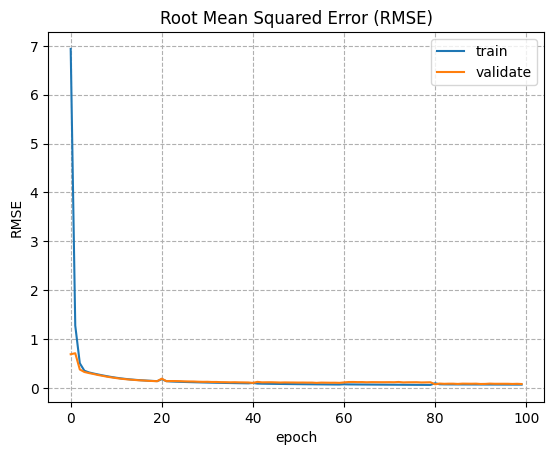

In [26]:
#error loss of the model
plt.plot(combined_rmse)
plt.plot(val_combined_rmse)
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.grid(linestyle="--")
#plt.xlim(95,100)
plt.show()

In [27]:
## making a prediction
def model_forecast(model, data, window_size, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(data)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)#returns learned label for each object in array 
    #dimensions:(no. windows, window size, no. features)
    return forecast

#adding dimension to test_data so it matches 3 dimensional forecast
forecast = model_forecast(model, data6_np[...,np.newaxis], WINDOW_SIZE, BATCH_SIZE)

In [28]:
predicted_values = forecast[int(len(data6_np)*0.75)-WINDOW_SIZE:-1,-1,0]#batch size (: all) time slice (-1 last one) features (only one, so first one)

In [29]:
error = tf.keras.metrics.RootMeanSquaredError()
error.update_state(test_data6, predicted_values)
rmse = error.result().numpy()
print(rmse)

1.2723218


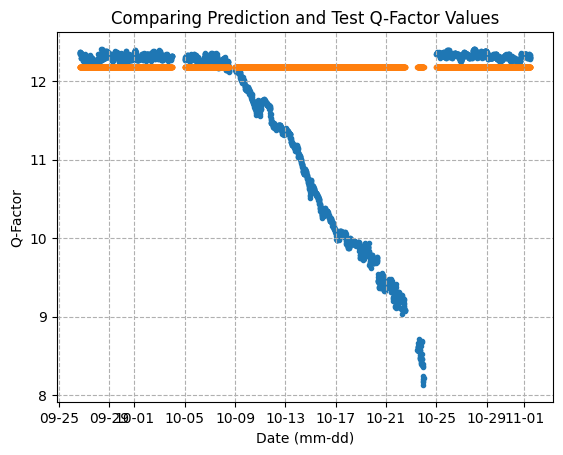

In [30]:
fig, ax = plt.subplots()
ax.scatter(test_time6, test_data6, s=9)
ax.scatter(test_time6, predicted_values, s=9)
ax.set(xlabel="Date (mm-dd)", ylabel="Q-Factor")
ax.xaxis.set_major_formatter(date_form)
ax.grid(linestyle="--")
ax.set_title('Comparing Prediction and Test Q-Factor Values')
plt.show()

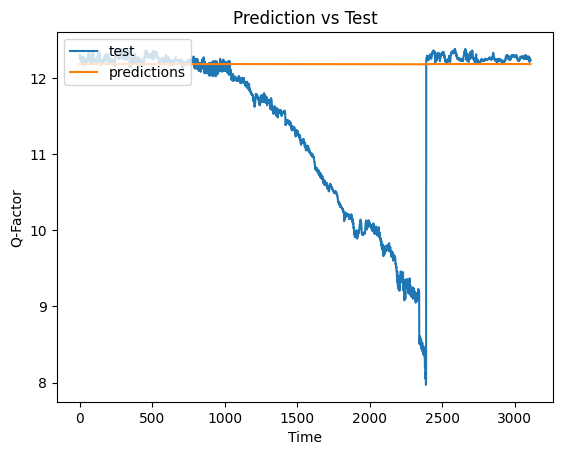

In [31]:
# comparison graph 
plt.plot(test_data3)
plt.plot(predicted_values)
plt.title('Prediction vs Test')
plt.ylabel('Q-Factor')
plt.xlabel('Time')
plt.legend(['test', 'predictions'], loc='upper left')
plt.show()